# Galaxy Morphology Classification Project
---

In [2]:
# import necessary dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create a new directory to save the useful data for this project
os.mkdir('galaxy_zoo_dataset')

FileExistsError: [Errno 17] File exists: 'galaxy_zoo_dataset'

In [5]:
#read the training data
train_path = '/kaggle/input/training-set/train_set_galaxy_zoo.csv'
train = pd.read_csv(train_path)
train.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [6]:
# read the test data
test_path = '/kaggle/input/test-set/test_set_galaxy_zoo.csv'
df_test = pd.read_csv(test_path)
df_test.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    127901  0.000000  1.000000  0.000000  0.042999  0.957001  0.168922   
1    105165  0.918964  0.064499  0.016536  0.000000  0.064499  0.000000   
2    120036  0.850411  0.124476  0.025114  0.000000  0.124476  0.000000   
3    113553  0.436999  0.527834  0.035167  0.175769  0.352065  0.000000   
4    119425  0.275073  0.724449  0.000478  0.071679  0.652770  0.587234   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.788079  0.957001  0.000000  ...    0.0215   0.387825   0.355245   
1  0.064499  0.000000  0.064499  ...    0.0000   0.000000   0.000000   
2  0.124476  0.000000  0.124476  ...    0.0000   0.000000   0.000000   
3  0.352065  0.000000  0.352065  ...    0.0000   0.000000   0.000000   
4  0.065536  0.306998  0.345772  ...    0.0000   0.233919   0.073079   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.213931   0.000000   0.525394   0.150249   0.056463   0.093786   0.131109  
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
4   0.000000   0.058214   0.125902   0.000000   0.000000   0.000000   0.122883  

[5 rows x 38 columns]

In [7]:
print(train.shape, df_test.shape)

(61278, 38) (300, 38)


In [ ]:
# Unzip the directory of training images
!unzip  /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip -d /kaggle/working/galaxy_zoo_dataset

Archive:  /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
   creating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100008.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100023.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100053.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100078.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100090.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100122.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100123.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100128.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100134.jpg  
  inflating: /kaggle/working/galaxy_zoo_dataset/images_training_rev1/100143.jpg  
  inflating: /kaggle/working/

* We have successfully unziped the training images and csv file

In [9]:
# Check the generic info of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61278 entries, 0 to 61277
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61278 non-null  int64  
 1   Class1.1   61278 non-null  float64
 2   Class1.2   61278 non-null  float64
 3   Class1.3   61278 non-null  float64
 4   Class2.1   61278 non-null  float64
 5   Class2.2   61278 non-null  float64
 6   Class3.1   61278 non-null  float64
 7   Class3.2   61278 non-null  float64
 8   Class4.1   61278 non-null  float64
 9   Class4.2   61278 non-null  float64
 10  Class5.1   61278 non-null  float64
 11  Class5.2   61278 non-null  float64
 12  Class5.3   61278 non-null  float64
 13  Class5.4   61278 non-null  float64
 14  Class6.1   61278 non-null  float64
 15  Class6.2   61278 non-null  float64
 16  Class7.1   61278 non-null  float64
 17  Class7.2   61278 non-null  float64
 18  Class7.3   61278 non-null  float64
 19  Class8.1   61278 non-null  float64
 20  Class8

* Thank God! Tere are no missing values.
* GalaxyID is alone in integer format, and rest of the data is float type.

In [10]:
# Take 20000 data instances for demonstration
df_train = train[:20000]
df_train.shape

(20000, 38)

In [11]:
# Check before proceeding ahead
print(f'Shape of Train Data Frame:- {df_train.shape}')
print(f'Shape of Test Data Frame:- {df_test.shape}')

Shape of Train Data Frame:- (20000, 38)
Shape of Test Data Frame:- (300, 38)


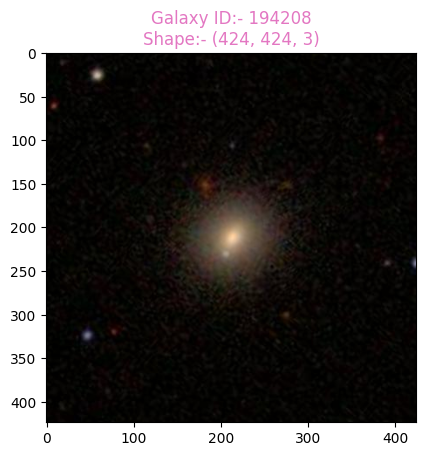

In [12]:
# visualizing the random image
root_dir = "/kaggle/working/galaxy_zoo_dataset/images_training_rev1/" # Root Path of Dir where training images are saved
ids_jpg = os.listdir(root_dir)   # List of files in the directory (eg. 10001.jpg)
id_ = np.random.choice(ids_jpg)  # Randomly choose one item from the list above
img_path = root_dir + id_      # Complete image path
random_image = plt.imread(img_path) # Get image pixels array
plt.imshow(random_image) # Display the image
plt.title(f'Galaxy ID:- {id_[:-4]}\nShape:- {random_image.shape}', 
          color = 'tab:pink')
plt.show()

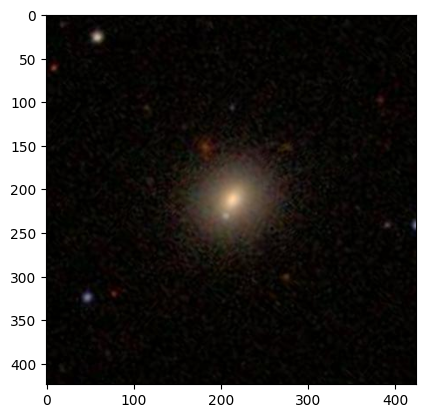

In [13]:
# Read the image path 
img_array = plt.imread(img_path)
plt.imshow(img_array)
plt.show()

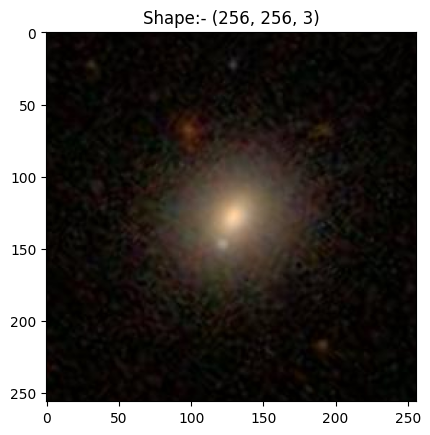

In [14]:
# Crop from (84, 84) and choose crop size as (256, 256)
START_FROM = (84, 84)
CROP_SIZE = (256, 256)
cropped_img = img_array[START_FROM[0]:START_FROM[0]+CROP_SIZE[0],
                        START_FROM[1]:START_FROM[0]+CROP_SIZE[1]]

# Check the output
plt.imshow(cropped_img)
plt.title(f'Shape:- {cropped_img.shape}')
plt.show()

In [15]:
# Check the max-min pixels of the cropped_img
print(f'Maximum Pixel of Cropped Image:- {cropped_img.max()}')
print(f'Minimum Pixel of Cropped Image:- {cropped_img.min()}')

Maximum Pixel of Cropped Image:- 255
Minimum Pixel of Cropped Image:- 0


In [17]:
#  resize using skimage
from skimage.transform import resize
resized_img = resize(cropped_img, (64, 64))

In [18]:
# Check the max-min pixels of the resized_img
print(f'Maximum Pixel of Cropped Image:- {resized_img.max()}')
print(f'Minimum Pixel of Cropped Image:- {resized_img.min()}')

Maximum Pixel of Cropped Image:- 0.9589898506181062
Minimum Pixel of Cropped Image:- 0.0004187950088287098


In [20]:
def get_image(path, x1, y1, resize_shape, crop_size):  
    """
    Get the preprocessing for single galaxy image
    
    Parameters
    ----------
    path: Image Path for the image on which you want to apply image processing
    x1: Start pixel for rows to begin the cropping
    y1: Start pixel for cols to begin the cropping
    resize_shape: The final shape of the image
    crop_size: Image will be cropped from start pixels to the crop size
    
    Returns
    -------
    preprocessed_img: Centered image of the galaxy
    
    """
    img_array = plt.imread(path)                       
    crop_img = img_array[x1:x1+crop_size[0], y1:y1+crop_size[1]] 
    preprocessed_img = resize(crop_img, resize_shape)                   
    return preprocessed_img

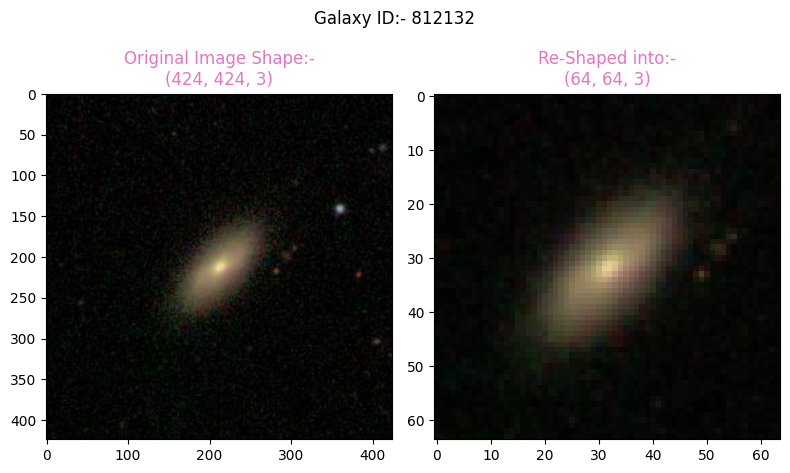

In [21]:
# Get random image path
id_ = np.random.choice(ids_jpg) 
img_path = root_dir + id_      
org_img = plt.imread(img_path)

# Preprocess it
x_data = get_image(img_path, 84, 84, (64,64), (256, 256))

# Display before after images
plt.figure(figsize=(8,5))
plt.suptitle(f'Galaxy ID:- {id_[:-4]}')

plt.subplot(121)
plt.imshow(org_img)
plt.title(f'Original Image Shape:-\n{org_img.shape}', color = 'tab:pink')

plt.subplot(122)
plt.imshow(x_data)
plt.title(f'Re-Shaped into:-\n{x_data.shape}', color = 'tab:pink')

plt.tight_layout()
plt.show()

In [22]:
# To check the progress of the loop we will need a library called as tqdm
from tqdm import tqdm 

In [23]:
# Image Data
ORG_SHAPE = (424,424)
CROP_SIZE = (256,256)
RESIZE_SHAPE = (64,64)

In [24]:
def get_all_images(dataframe, resize_shape=RESIZE_SHAPE, crop_size=CROP_SIZE):
    """
    Use dataframe to get image ids and preprocess all of them using get_image function
    
    Parameters
    ----------
    dataframe: Data frame should have first column for galaxy ids
    resize_shape: Image to be resized into this shape
    crop_size: Crop size for the image before resizing
    
    Return
    ------
    x_batch: Array of batch of images (batch_size, Height, Width, Channels)
    y_batch: Array of respective probabilities for image (batch_size, Cols) 
    """

    # Get the centre of the image where region of interest is present
    x1 = (ORG_SHAPE[0]-CROP_SIZE[0])//2       # (424-256)//2 = 84
    y1 = (ORG_SHAPE[1]-CROP_SIZE[1])//2       # (424-256)//2 = 84

    # Form x and y batches
    sel = dataframe.values                     # dataftame values in array
    ids = sel[:,0].astype(int).astype(str)     # Get Galaxy ID in string
    y_batch = sel[:,1:]                        # Get All feature values except first column (Galaxy ID)
    x_batch = []                               # Define X_batch
    for i in tqdm(ids):
        x = get_image(root_dir + i + '.jpg', x1, y1, resize_shape=resize_shape, crop_size=crop_size)
        # Calling Get Image by giving set of arguments
        x_batch.append(x) # append the cropped and resized image x into x_batch
    x_batch = np.array(x_batch)    # convert x_batch each images into numby array

    # Return the batches
    return x_batch, y_batch

In [25]:
# Apply the function to get X_train, y_train, X_test, y_test
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)      # Validation set

100%|██████████| 300/300 [00:01<00:00, 162.28it/s]


In [26]:
# Check the shapes for training set
print('X_train Shape:- ')
print(X_train.shape)

print('\ny_train Shape:- ')
print(y_train.shape)

X_train Shape:- 
(20000, 64, 64, 3)

y_train Shape:- 
(20000, 37)


In [27]:
# Check the shapes for testing set
print('X_test Shape:- ')
print(X_test.shape)

print('\ny_test Shape:- ')
print(y_test.shape)

X_test Shape:- 
(300, 64, 64, 3)

y_test Shape:- 
(300, 37)


In [28]:
# Important imports for building the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import LeakyReLU
import keras
from tensorflow.keras import backend as K

2024-08-05 13:09:26.090016: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 13:09:26.090134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 13:09:26.217822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


* Initiate the Model --> Sequential API
* Allow us to add layers in sequence
* For now, we will have this architecture:- `Input Layer` -> `Conv` -> `Conv` -> `Max Pool` -> `Flatten` -> `Dense` --> `Dropout` ->  `Dense (output)`
* Later, you can modify it according to your preferences

In [51]:
# Create the Sequential Model
model = Sequential()

# Build the model with Inputs, 2 Conv, 1 MaxPool followed by Flatten, Dense, Droput and Output
model.add(Conv2D(1024, (3, 3), activation='leaky_relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))          
model.add(Conv2D(512, (3, 3),activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(256, (3, 3),activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3),activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='leaky_relu'))
model.add(Dense(512, activation='leaky_relu'))
model.add(Dense(256, activation='leaky_relu'))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dropout(0.3)) 
model.add(Dense(37,activation='sigmoid')) 

# Check the summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 1024)   │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 1024)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 512)    │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 37)             │         1,221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,448,613 (28.41 MB)

 Trainable params: 7,448,613 (28.41 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Create a function to calculate RMSE from the outputs
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [53]:
# compile the model
model.compile(loss='mse', 
              optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=[root_mean_squared_error])

In [55]:
# train the model
model.fit(X_train, 
          y_train, 
          epochs=50, 
          validation_data=(X_test, y_test), 
          batch_size=64)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1108
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - loss: 0.0104 - root_mean_squared_error: 0.1017 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1084
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1114
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - loss: 0.0099 - root_mean_squared_error: 0.0994 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1110
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1100
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━

### Step 8: Get the predictions

In [56]:
# actual outputs of test set
y_test_df = pd.DataFrame(y_test, columns = list(df_train.columns[1:]))
y_test_df.head()

Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  Class3.2  \
0  0.000000  1.000000  0.000000  0.042999  0.957001  0.168922  0.788079   
1  0.918964  0.064499  0.016536  0.000000  0.064499  0.000000  0.064499   
2  0.850411  0.124476  0.025114  0.000000  0.124476  0.000000  0.124476   
3  0.436999  0.527834  0.035167  0.175769  0.352065  0.000000  0.352065   
4  0.275073  0.724449  0.000478  0.071679  0.652770  0.587234  0.065536   

   Class4.1  Class4.2  Class5.1  ...  Class9.3  Class10.1  Class10.2  \
0  0.957001  0.000000       0.0  ...    0.0215   0.387825   0.355245   
1  0.000000  0.064499       0.0  ...    0.0000   0.000000   0.000000   
2  0.000000  0.124476       0.0  ...    0.0000   0.000000   0.000000   
3  0.000000  0.352065       0.0  ...    0.0000   0.000000   0.000000   
4  0.306998  0.345772       0.0  ...    0.0000   0.233919   0.073079   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.213931   0.000000   0.525394   0.150249   0.056463   0.093786   0.131109  
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
4   0.000000   0.058214   0.125902   0.000000   0.000000   0.000000   0.122883  

[5 rows x 37 columns]

In [58]:
# This is our actual train outputs
y_train_df = pd.DataFrame(y_train, columns = list(df_train.columns[1:]))
y_train_df.head()

Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  Class3.2  \
0  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452  0.578401   
1  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370  0.165229   
2  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000  0.177352   
3  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493  0.129071   
4  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000  0.000000   

   Class4.1  Class4.2  Class5.1  ...  Class9.3  Class10.1  Class10.2  \
0  0.418398  0.198455       0.0  ...  0.000000   0.279952   0.138445   
1  0.591328  0.041271       0.0  ...  0.018764   0.000000   0.131378   
2  0.000000  0.177352       0.0  ...  0.000000   0.000000   0.000000   
3  0.189098  0.049466       0.0  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000       0.0  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 37 columns]

In [59]:
#predicted train outputs
pred_train = np.array(model.predict(X_train))
pred_train_df = pd.DataFrame(pred_train, columns = list(df_train.columns[1:]))
pred_train_df.head()

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step


Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  Class3.2  \
0  0.336642  0.652662  0.014490  0.013596  0.643319  0.088448  0.579905   
1  0.174430  0.809318  0.015962  0.175479  0.651213  0.566664  0.186836   
2  0.792371  0.180355  0.009142  0.004881  0.116383  0.006662  0.082793   
3  0.677192  0.266729  0.046751  0.000693  0.273240  0.016809  0.220527   
4  0.864638  0.101163  0.020430  0.000043  0.111554  0.004963  0.074374   

   Class4.1  Class4.2  Class5.1  ...      Class9.3  Class10.1  Class10.2  \
0  0.334460  0.315315  0.013851  ...  1.011425e-03   0.213688   0.096477   
1  0.558192  0.145624  0.077498  ...  4.946934e-02   0.146146   0.262334   
2  0.010233  0.101709  0.005262  ...  1.117556e-04   0.003001   0.002058   
3  0.049047  0.219612  0.006611  ...  1.572510e-05   0.014862   0.012415   
4  0.012919  0.083894  0.000928  ...  1.668670e-07   0.003928   0.002155   

   Class10.3  Class11.1  Class11.2  Class11.3     Class11.4     Class11.5  \
0   0.008255   0.011891   0.055925   0.015251  5.285469e-03  4.018676e-03   
1   0.305084   0.035402   0.524514   0.028512  1.851044e-02  1.196820e-02   
2   0.000865   0.000110   0.001063   0.000037  8.767925e-06  8.421073e-06   
3   0.001229   0.001141   0.004038   0.000195  2.914308e-05  1.987123e-05   
4   0.000066   0.000056   0.000594   0.000011  7.427281e-07  4.524047e-07   

   Class11.6  
0   0.168451  
1   0.107136  
2   0.009653  
3   0.023091  
4   0.007025  

[5 rows x 37 columns]

In [60]:
pred_train_df.shape

(20000, 37)

In [61]:
# predicted test outputs
pred_test = np.array(model.predict(X_test))
pred_test_df = pd.DataFrame(pred_test, columns = list(df_train.columns[1:]))
pred_test_df.head()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  Class3.2  \
0  0.004495  0.994564  0.000072  0.012095  0.975562  0.401099  0.600594   
1  0.301389  0.677716  0.019373  0.223036  0.272931  0.035203  0.166593   
2  0.774210  0.193151  0.024147  0.000944  0.175233  0.009765  0.149405   
3  0.458143  0.521734  0.014577  0.009060  0.501794  0.102462  0.340065   
4  0.356440  0.634351  0.016017  0.015383  0.617420  0.398489  0.283450   

   Class4.1  Class4.2  Class5.1  ...  Class9.3  Class10.1  Class10.2  \
0  0.941854  0.049576  0.020963  ...  0.000733   0.372992   0.503908   
1  0.059851  0.162962  0.018983  ...  0.019845   0.019138   0.021690   
2  0.021222  0.163396  0.003309  ...  0.000011   0.008173   0.004738   
3  0.129210  0.327119  0.012665  ...  0.000280   0.066109   0.037676   
4  0.196141  0.463917  0.017018  ...  0.001010   0.138009   0.077135   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.126522   0.019001   0.619380   0.081895   0.012811   0.002758   0.105568  
1   0.016238   0.002958   0.011260   0.000799   0.000373   0.000345   0.030213  
2   0.000585   0.000312   0.001855   0.000078   0.000014   0.000010   0.016317  
3   0.006297   0.003360   0.022572   0.002011   0.000814   0.000862   0.084602  
4   0.008094   0.005078   0.048563   0.003674   0.001725   0.002910   0.126113  

[5 rows x 37 columns]

In [62]:
#  RMSE on the train data
print(np.array(root_mean_squared_error(y_train_df.values, pred_train_df.values)))

0.06380395794937853


In [63]:
 #RMSE on the test/val data
print(np.array(root_mean_squared_error(y_test_df.values, pred_test_df.values)))

0.1111112006598415


In [64]:
import pandas as pd
from IPython.display import FileLink, display
# Sample data for demonstration
data = {
    "Changes Made": [
        "Initial model",
        "Changed architecture, Dropout=0.3, activation='leaky relu', learning rate=0.0001, batch_size=64, sample_size=20,000",
        "Changed architecture, Dropout=0.3, activation='leaky relu', learning rate=0.0001, batch_size=64, sample_size=30,000",
        "Changed architecture, Dropout=0.3, activation='leaky relu', learning rate=0.0001, batch_size=64, sample_size=10,000",
        "Changed architecture, Dropout=0.3, activation='leaky relu', learning rate=0.0001, batch_size=64, sample_size=20,000"
        
    ],
    "Train RMSE Score": [
        0.14,
        0.0791,  
        0.0776,  
        0.0990,   
        0.0927
    ],
    "Test RMSE Score": [
        0.14,  
        0.1086,  
        0.1102,
        0.1110,   
        0.1119
    ]
}

# Create DataFrame
df_table= pd.DataFrame(data)

# Print the DataFrame
print(df_table)

#save the table
df_table.to_csv("'cnn_results.xlsx', index=False")


                                        Changes Made  Train RMSE Score  \
0                                      Initial model            0.1400   
1  Changed architecture, Dropout=0.3, activation=...            0.0791   
2  Changed architecture, Dropout=0.3, activation=...            0.0776   
3  Changed architecture, Dropout=0.3, activation=...            0.0990   
4  Changed architecture, Dropout=0.3, activation=...            0.0927   

   Test RMSE Score  
0           0.1400  
1           0.1086  
2           0.1102  
3           0.1110  
4           0.1119  
